In [1]:
#IMPORTAR LIBRERIAS

In [43]:
import numpy as np
import tensorflow as tf
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [44]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.layers.advanced_activations import LeakyReLU

In [45]:
#CARGAR EL SET DE IMAGENES

In [46]:
dirname = os.path.join(os.getcwd(), 'spiderimage')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\souls\Documents\GitHub\SPIDERS-IA\Spiders\spiderimage\
C:\Users\souls\Documents\GitHub\SPIDERS-IA\Spiders\spiderimage\norincon 1
C:\Users\souls\Documents\GitHub\SPIDERS-IA\Spiders\spiderimage\rincon 584
Directorios leidos: 2
Imagenes en cada directorio [585, 202]
suma Total de imagenes en subdirs: 787


In [47]:
#CREAMOS ETIQUETAS

In [48]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  787


In [49]:
spiders=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    spiders.append(name[len(name)-1])
    indice=indice+1

0 norincon
1 rincon


In [50]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Encuentra los números únicos de las etiquetas 
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [51]:
#CREAMOS SET DE ENTRENAMIENTO Y TEST

In [52]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (629, 300, 300, 3) (629,)
Testing data shape :  (158, 300, 300, 3) (158,)


Text(0.5, 1.0, 'Ground Truth : 1')

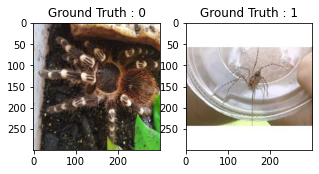

In [53]:
plt.figure(figsize=[5,5])

# Mostrar la primera imagen en los datos de entrenamiento 
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Mostrar la primera imagen en los datos de prueba 
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [54]:
#PROCESAMOS LAS IMAGENES

In [55]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [56]:
#HACEMOS EL ONE-HOT ERNCONDING PARA LA RED

In [57]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0.]


In [58]:
#CREAMOS SET DE ENTRENAMIENTO Y VALIDACIÓN 

In [59]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [60]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(503, 300, 300, 3) (126, 300, 300, 3) (503, 2) (126, 2)


In [61]:
#CREAMOS EL MODELO CNN

In [62]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 2 # cantidad de imágenes que se toman a la vez en memoria

In [63]:
spider_model = Sequential()
spider_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(300,300,3)))
spider_model.add(LeakyReLU(alpha=0.1))
spider_model.add(MaxPooling2D((2, 2),padding='same'))
spider_model.add(Dropout(0.5))

spider_model.add(Flatten())
spider_model.add(Dense(32, activation='linear'))
spider_model.add(LeakyReLU(alpha=0.1))
spider_model.add(Dropout(0.5))
spider_model.add(Dense(nClasses, activation='softmax'))

In [64]:
spider_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 300, 300, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150, 150, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                23040032  
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32)               

In [65]:
spider_model.compile(loss=keras.losses.categorical_crossentropy, 
                    optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

C:\Users\souls\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [66]:
#ENTRENAMOS EL MODELO: APRENDE A CLASIFICAR IMAGENES

In [67]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
spider_train = spider_model.fit(train_X, train_label, batch_size=batch_size,
                              epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/6
252/252 [==============================] - 27s 106ms/step - loss: 1.1014 - accuracy: 0.6421 - val_loss: 0.3092 - val_accuracy: 0.8651
Epoch 2/6
252/252 [==============================] - 27s 106ms/step - loss: 0.4362 - accuracy: 0.8350 - val_loss: 0.3362 - val_accuracy: 0.8254
Epoch 3/6
252/252 [==============================] - 26s 105ms/step - loss: 0.3445 - accuracy: 0.8549 - val_loss: 0.2221 - val_accuracy: 0.8968
Epoch 4/6
252/252 [==============================] - 28s 110ms/step - loss: 0.2477 - accuracy: 0.9105 - val_loss: 0.2230 - val_accuracy: 0.8889
Epoch 5/6
252/252 [==============================] - 27s 109ms/step - loss: 0.1862 - accuracy: 0.9483 - val_loss: 0.1163 - val_accuracy: 0.9683
Epoch 6/6
252/252 [==============================] - 27s 109ms/step - loss: 0.1610 - accuracy: 0.9384 - val_loss: 0.1873 - val_accuracy: 0.9444


In [68]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
spider_model.save("spider_mnist.h5py")

INFO:tensorflow:Assets written to: spider_mnist.h5py\assets


In [69]:
#EVALUAMOS LA RED

In [70]:
test_eval = spider_model.evaluate(test_X, test_Y_one_hot, verbose=1)

5/5 [==============================] - 1s 179ms/step - loss: 0.3108 - accuracy: 0.8797


In [71]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3107873499393463
Test accuracy: 0.8797468543052673


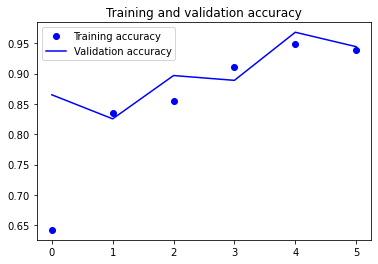

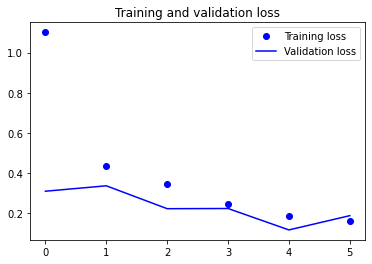

In [72]:
accuracy = spider_train.history['accuracy']
val_accuracy = spider_train.history['val_accuracy']
loss = spider_train.history['loss']
val_loss = spider_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [73]:
predicted_classes2 = spider_model.predict(test_X)

In [74]:
predicted_classes=[]
for predicted_spider in predicted_classes2:
    predicted_classes.append(predicted_spider.tolist().index(max(predicted_spider)))
predicted_classes=np.array(predicted_classes)

In [75]:
predicted_classes.shape, test_Y.shape

((158,), (158,))

In [76]:
#APRENDEMOS DE LOS ERRORES: QUE MEJORAR

Found 139 correct labels


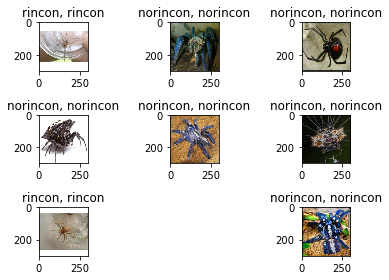

In [77]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(300,300,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(spiders[predicted_classes[correct]],
                                                    spiders[test_Y[correct]]))

    plt.tight_layout()

Found 19 incorrect labels


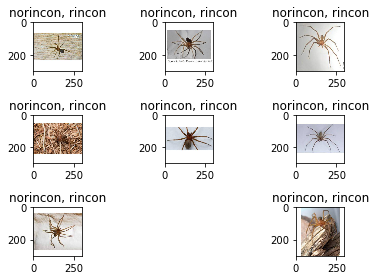

In [78]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(300,300,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(spiders[predicted_classes[incorrect]],
                                                    spiders[test_Y[incorrect]]))
    plt.tight_layout()

In [79]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      1.00      0.92       110
     Class 1       1.00      0.60      0.75        48

    accuracy                           0.88       158
   macro avg       0.93      0.80      0.84       158
weighted avg       0.90      0.88      0.87       158



In [80]:
#PREDICCION DE UNA NUEVA IMAGEN

In [81]:
from skimage.transform import resize

images=[]#SPIDER#
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['Spiders-Hero-1_2X.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (300, 300),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = spider_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], spiders[img_tagged.tolist().index(max(img_tagged))])

Spiders-Hero-1_2X.jpg norincon
